In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob
from datetime import date

## Illumina cohort. 2520 samples

In [77]:
# Illumina cohort. 2520 samples
ill = pd.read_csv('./input/p1_2520_Illumina_raw_path.csv', header=None)
# rename columns
ill.columns = ['path']
# add sample names
ill['sample'] = ill['path'].str.split('/').str[-2]
ill['cohort'] = 'Illumina'
ill.tail(2)

,path,sample,cohort
2519,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VYHHE1,Illumina
2520,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VZ24LG,Illumina


## BGI cohort, part 1. 1908 samples

In [78]:
# add cultom column names
bgi1 = pd.read_csv('./input/p1_1908_BGI_clean_path.csv', header=None)
# rename columns
bgi1.columns = ['path']
# add sample names
bgi1['sample'] = bgi1['path'].str.split('/').str[-2].str.split('_').str[1]
bgi1['cohort'] = 'BGI1'
bgi1.tail(2)

,path,sample,cohort
1906,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VV639H,BGI1
1907,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VV71E6,BGI1


## BGI cohort, part 2. 197 samples

In [84]:
# add cultom column names
bgi2 = pd.read_csv('./input/smpls_list_BGI_p2.csv', header=None)
# rename columns
bgi2.columns = ['Spath']
# add sample names
bgi2['sample'] = bgi2['Spath'].str.split('/').str[-2]
bgi2['path'] = '/gpfs/space/GI/GV/EGCUT_data/omics_data/microbiomics/BGI2_raw/MMHP_Tartu/'+bgi2['Spath']
bgi2 = bgi2[['path','sample']]

# skip fq2 reads 
mask = ~bgi2['path'].str.endswith('2.fq.gz')
# Apply the mask to filter out the rows
bgi2 = bgi2[mask]

#bgi2['path'].str[:-8].drop_duplicates().to_csv('./input/p2_197_BGI_raw_path.csv', index=False)
bgi2['path'].to_csv('./input/p2_197_BGI_raw_path.csv', index=False)
bgi2['cohort'] = 'BGI2'
bgi2.tail(2)

,path,sample,cohort
602,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VYUQHR,BGI2
604,/gpfs/space/GI/GV/EGCUT_data/omics_data/microb...,VYXJ7L,BGI2


In [76]:
## 102 samples were sequenced twice!

In [88]:
# make a table with all sequenced samples
all = pd.concat([ill, bgi1,bgi2])
all = all.reset_index(drop=True).sort_values(by=['sample'])
all.tail(2)

all.to_csv('./all_sequenced_samples.csv', index=False)

## Compare samples lists

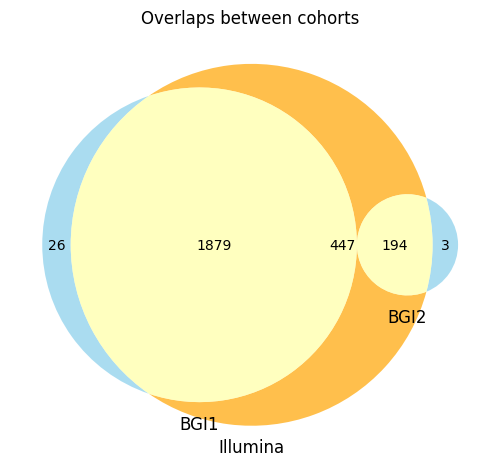

In [73]:
# add vienn diagram for samples
from matplotlib_venn import venn2
from matplotlib_venn import venn3

venn3([set(bgi1['sample'].to_list()), 
       set(bgi2['sample'].to_list()),
       set(ill['sample'].to_list())],
       set_labels=('BGI1', 'BGI2','Illumina'),
       set_colors=('skyblue', 'skyblue','orange'), alpha = 0.7)

plt.title('Overlaps between cohorts')
plt.tight_layout()

plt.savefig('Overlaps1.svg')
plt.savefig('Overlaps1.png', dpi=300)

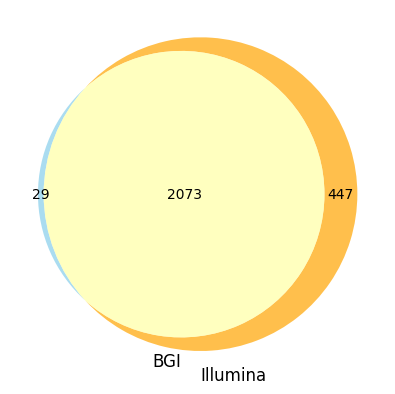

In [43]:
# combine bgi1 and bgi2
bgi = pd.concat([bgi1,bgi2])

venn2([set(bgi['sample'].to_list()), 
       set(ill['sample'].to_list())],
       set_labels=('BGI', 'Illumina'),
       set_colors=('skyblue', 'orange'), alpha = 0.7)

In [64]:
# Samples presented only in ILLUMINA cohort
non_overlapping_samples =  set(ill['sample']) - set(bgi['sample'])

# Convert the non-overlapping samples set to a sorted list
non_overlapping_samples_list = sorted(list(non_overlapping_samples))

# Specify the output file path
output_file_path = "Illumina_only_samples.txt"

# Write the non-overlapping samples to a file
with open(output_file_path, "w") as file:
    file.write("Illumina_only_samples:\n")
    for sample in non_overlapping_samples_list:
        file.write(sample + "\n")

print(len(non_overlapping_samples))


447


In [65]:
# Samples presented only in ILLUMINA cohort
non_overlapping_samples =  set(bgi['sample']) - set(ill['sample'])

# Convert the non-overlapping samples set to a sorted list
non_overlapping_samples_list = sorted(list(non_overlapping_samples))

# Specify the output file path
output_file_path = "BGI_only_samples.txt"

# Write the non-overlapping samples to a file
with open(output_file_path, "w") as file:
    file.write("BGI_only_samples:\n")
    for sample in non_overlapping_samples_list:
        file.write(sample + "\n")

print(len(non_overlapping_samples))


29


In [71]:
set(bgi2['sample']) - set(ill['sample'])

{'MB04_B10', 'MB14_G7', 'V4SFLT_1'}